<a href="https://colab.research.google.com/github/DavidSenseman/STA1403/blob/master/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **STA1403: "Biostats"**

### **Assignment 10: Cluster Analysis**

#### In this assignment you will learn about:

* K-Means Cluster Analysis
* Mapping integer values to replace string variables
* Using the `dataframe.copy()` method to make a copy of a dataframe.
* How to drop specific columns in a dataframe
* How to standardize the data
* Converting a DataFrame into a NumPy Array
* The Elbow Method for selecting estimating the correct K value


### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [1]:
# You must run this cell second
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
david.senseman@gmail.com


# **Introduction to Cluster Analysis**

**_Cluster analysis_** is a data analysis technique that explores the naturally occurring groups within a data set known as **_clusters_**. Cluster analysis doesn't need to group data points into any predefined groups, which means that it is an **_unsupervised_** learning method. Like regression analysis, cluster analysis is considered a form of **_Machine Learning_** that is one of the main componenets of **_Artifical Intelligence_** or **_AI_**.

![__](https://biologicslab.co/STA1403/images/A11/AI.png)

The two main forms of Cluster Analysis is **_K-Means Cluster Analysis_** and **_Hierachial Cluster Analysis_**. K-means clustering is the most commonly used unsupervised machine learning algorithm for partitioning a given data set into a set of **_K_** groups (i.e. k clusters), where **_K_** represents the number of groups pre-specified by the analyst. It classifies objects in multiple groups (i.e., _clusters_), such that objects within the same cluster are as similar as possible (i.e., high intra-class similarity), whereas objects from different clusters are as dissimilar as possible (i.e., low inter-class similarity). In k-means clustering, each cluster is represented by its center (i.e, centroid) which corresponds to the mean of points assigned to the cluster.

There are two potential problems with the K-means clustering algorithm. First, it is a flat clustering method. After observations are assigned to their clusters, they are all considered to be similar within the same cluster. That is, the observations are not further separated based on dissimilarity within a cluster. Secondly, we need to specify the number of clusters K _a priori_. Finding the appropriate number of clusters is not trivial, and the selected number has a substantial impact on the results.

An alternative approach that avoids these issues is **hierarchical clustering**. The result of this method is a dendrogram (a tree). The root of the dendrogram is its highest level and contains all _n_ observations. The leaves of the tree are its lowest level and are each a unique observation.

In this lesson, the cluster analysis approach is introducted by using K-Means Cluster analyis to classify three species of the iris flowers based on their petal and sepal lengths. In a future lesson we look at an example of hiearchical cluster analysis.

### Example 1: Read Datafile and Store in DataFrame

The code in the cell below reads the datafile `iris.csv` from the course webserver and stores the information in a new DataFrame called `irisDF`. To check if the DataFrame was created correctly, the first 5 records are displayed.

In [2]:
# Example 1: Read datafile and store in dataframe

import pandas as pd

# Read data file
irisDF = pd.read_csv("https://biologicslab.co/STA1403/data/iris.csv",
                   sep=',')  # define the separator as a comma

# Print out the first 6 values.
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


If the code is correct, you should see the following output:

![__](https://biologicslab.co/STA1403/images/A10/assignment_10_image01.png)

### Example 2: Print Summary Statistics

The code in the cell below uses the Pandas method `df.describe()` to print out the summary statistics for the DataFrame `irisDF`.

In [3]:
# Example 2: Print summary statistics

import pandas as pd

irisDF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


If the code is correct, you should see the following output:

![__](https://biologicslab.co/STA1403/images/A10/assignment_10_image02.png)

### Example 3: Generate x-values

The code in the cell below creates a numpy array called `irisX` that contains the all of the numerical data in `irisDF` except for the data in the column `species`. These data will be the independent values (x-values) for the analyzes below.

The array `irisX` contains measurements for both petal dimensions (petal length, petal width) as well as the sepal dimensions (sepal length, sepal width). The sepal dimensions are accessed as: `irisX[:, 0:2]` while the petal dimensions are accessed as: `irisX[:, 2:4]`.

5.1	3.5	1.4	0.2	I

In [20]:
# Example 3: Generate x-values

import pandas as pd
import numpy as np

X_columns = irisDF.columns.drop('species')

# Generate x-values as numpy array
irisX = irisDF[X_columns].values

# Set print options to limit the number of lines to 10
np.set_printoptions(threshold=6)

# Print header
print("---Sepal Lengths, Widths for 6 Flowers-------")

# Print out x-values for sepal data
irisX[:,0:2]

---Sepal Lengths, Widths for 6 Flowers-------


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       ...,
       [6.5, 3. ],
       [6.2, 3.4],
       [5.9, 3. ]])

If the code is correct, you should see the following output:

~~~text
---Sepal Lengths, Widths for 6 Flowers-------
array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       ...,
       [6.5, 3. ],
       [6.2, 3.4],
       [5.9, 3. ]])
~~~

### Example 4: Create Array with y-values

The code in the cell belows creates a numpy array called `irisY` that contains the y-values for the analyses below.


In [6]:
# Example 4: Create array with y-values

import pandas as pd

irisDF_mapped = irisDF.copy()
mapping =  {'Iris-setosa': 0,
            'Iris-versicolor': 1,
            'Iris-virginica': 2}

irisDF_mapped['species'] = irisDF_mapped['species'].map(mapping)

irisY=irisDF_mapped['species'].values
irisY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

If the code is correct, you should see the following output:

~~~text
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
~~~

### **Example 1: _K-Means Cluster Analysis_ of the Iris dataset**

In this example we will use K-Means Cluster Analysis to separate three species of iris:  _Iris setosa_, _Iris virginica_ and _Iris versicolor_ using the famous **_Iris Data Set_**.

The Iris flower data set or **_Fisher's Iris data set_** is a multivariate data set that was used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper(1). The data set consists of 50 samples from each of three species of Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). The image below shows the flower of each of these species.

![__](https://biologicslab.co/STA1403/images/A11/irisSpecies.png)


Four features were measured from each iris plant: the length and the width of the sepals and petals, in centimeters.

![__](https://biologicslab.co/STA1403/images/A11/SepalPetal.png)

In statistics, a **_cluster_** refers to a collection of data points aggregated together because of certain similarities. In this example, flowers of the same species form a cluster since each species has relatively unique combination of petal and sepal lengths and widths. The K-Means Cluster analysis is based on algorithm's movement of **_K centroids_** around the parameter space until each centroid is a close to the center of a cluster as possible.

### **The Centroid**

A **_centroid_** is the imaginary or real location representing the center of the cluster. If there are 3 clusters, as in this example, there will be 3 centroids, one for each cluster. In mathematics and physics, the _centroid_ (also known as geometric center of a figure), the arithmetic mean position of all the points in the surface of the figure. The ‘means’ in the K-means refers to averaging of the data, that is, finding the centroid.

### **How the K-means algorithm works**

As mentioned about, K-Means Cluster analysis is a form of **_Machine Learning_**. Your computer performs a series of "loops" (_iterations_) in which it is **_learning about the data_**. The K-means algorithm starts with a first group of randomly selected **_K_** centroids--their initial location within the parameter space is randomized--which are used as the beginning points for every cluster. Your computer then performs iterative (repetitive) calculations to optimize the positions of the centroids as close to the center of its respective cluster as possible. To make these calculation manually would take a considerable amount of time and effort on your part. However, these calculations are **_exactly_** this kind of small repetitive task that computers are supremely good at and can perform at blazing speeds.

In this example, we will be asking your computer to make up to 300 iterations. In other words, your computer will repeat the K-means computational procedure over and over, and each time, it will apply to the result of the last run to improve the results obtained the next run. On every run, your computer will (hopefully) get closer (better) approximations to the solution of our problem -- separating all 150 iris plants in our sample into 3 clusters, one for each species.

The software is smart enough to know when the centroids have stabilized and there is no change in their values because the clustering has been successful. At this point the "looping" will stop and the results will be printed out. However, some data is not separable into clusters in which case the program terminates when the number of maximum iterations has been reached.

# **Estimating _K_ using the _Elbow Method_**

One of the challenges using K-Means analysis is deciding on the number of clusters to look for. In this example we already know that we should be looking for 3 clusters, one for each plant species. But in most cases we won't know how many clusters to look for. Fortunatley, for picking what number to use for **_K_**, there is a widely accepted technique cslled the **_Elbow Method_** that gives an estimate for **_K_**.

In the Elbow Method, we are actually varying the number of clusters (K) from 1 – 10. For each value of *_K_*, we are calculating **_WCSS_** (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

The Python code in the cell below generates a line plot of the WCSS for **_K_** values from 1 to 10.

### Example 5: Generate Elbow Plot

The code in the cell below creates an "Elbow Plot". The Elbow Plot is generated using only the sepal dimensions that were stored in `irisX`.

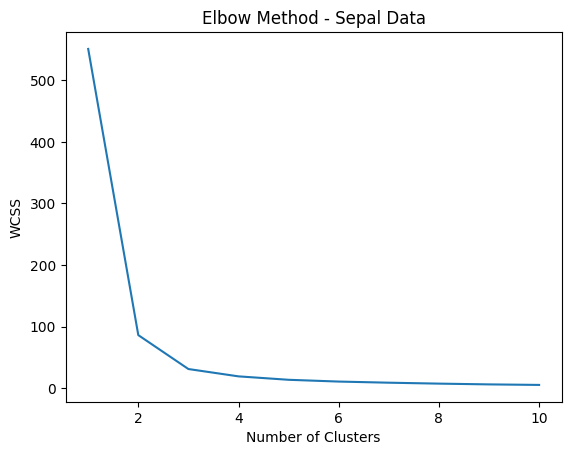

In [21]:
# Example 5: Generate Elbow Plot

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Use only sepal data
sepalX=irisX[:, 0:2]

# Create the WCSS Plot against no. of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(petalX)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method - Sepal Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

If the code is correct, you should see the following output:

![__](https://biologicslab.co/STA1403/images/A10/assignment_10_image03.png)

When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

As expected the Elbow Point for the iris data is K = 3.


## **K-Means Cluster analysis of the Iris data**

The Python package called **_scikit-learn_** provides a number of powerful machine learning functions for Python. In the next code cell we use the scikit-learn function, `KMeans()` to perform the analsys.

This function was imported at the beginning of this lesson.

`from sklearn.cluster import KMeans`

`KMeans()` takes several arguments. The first arugment, `n_clusters` is the number of clusters that we want the algorithm to look for. In this case `n_clusters=3` since that was the result of the Elbow Method. We have also set the maximum iterations, `max_iter`, to be 300 which is a reasonable value.

After `KMeans()` has run, we use the graphics program, **_Matlibplot_** (alias `plt`) to generate a graphical outout the results as an X-Y scatterplot.

### Example 6: Compute Statistics

The code in the cell below computes a variety of statistics for the **sepal** dimensions.

In [30]:
# Example 6: Compute statistics

import pandas as pd

# Group by species and compute mean sepal length and width
grouped = irisDF.groupby('species').mean()

# Compute sepal length/width ratios
grouped['sepal_ratio'] = grouped['sepal_length'] / grouped['sepal_width']

# Print results
for species, data in grouped.iterrows():
    print(f"{species} --  mean sepal length = {data['sepal_length']:.3f} mm "
          f": mean sepal width = {data['sepal_width']:.3f} mm "
          f": sepal length/width = {data['sepal_ratio']:.3f}")


Iris-setosa --  mean sepal length = 5.006 mm : mean sepal width = 3.418 mm : sepal length/width = 1.465
Iris-versicolor --  mean sepal length = 5.936 mm : mean sepal width = 2.770 mm : sepal length/width = 2.143
Iris-virginica --  mean sepal length = 6.588 mm : mean sepal width = 2.974 mm : sepal length/width = 2.215


If the code is correct, you should see the following output:

~~~text
Iris-setosa --  mean sepal length = 5.006 mm : mean sepal width = 3.418 mm : sepal length/width = 1.465
Iris-versicolor --  mean sepal length = 5.936 mm : mean sepal width = 2.770 mm : sepal length/width = 2.143
Iris-virginica --  mean sepal length = 6.588 mm : mean sepal width = 2.974 mm : sepal length/width = 2.215
~~~

### Example 7: Perform Cluster Analysis and Plot Results

The code in the cell below performs K-Means Cluster Analysis on the sepal dimensions and generates a scatter plots showing the clusters and their centroids.

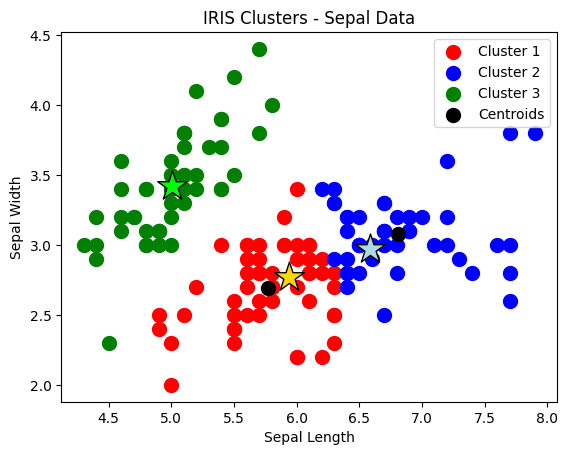

In [41]:
# Example 7: Perform Cluster Analysis and Plot Results


import matplotlib.pyplot as plt
import numpy as np

# Define X as sepal dimensions
X = irisX[:, 0:2]

# Train K-Means Clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Create the visualization plot of the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

# Print location of average sepal length and width for each species as a star
plt.scatter(avgSetosaSepalLen,avgSetosaSepalWid, marker='*', s=500, c='lime', edgecolor='black')
plt.scatter(avgVersicolorSepalLen,avgVersicolorSepalWid, marker='*', s=500, c='gold', edgecolor='black')
plt.scatter(avgVirginicaSepalLen,avgVirginicaSepalWid, marker='*', s=500, c='lightblue', edgecolor='black')

# Print title and labels
plt.title('IRIS Clusters - Sepal Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Print the legend
plt.legend()

# Show the plot
plt.show()

If the code is correct, you should see the following output:

![__](https://biologicslab.co/STA1403/images/A10/assignment_10_image04.png)

This scatterplot shows colored 150 data points--one for each iris plant in the sample--as an X-Y pair. The X-value of a pair is the **Sepal Length** of a particular plant, while the Y-value is the **Sepal Width** of the same plant. As you can see by inspection, the K-Means analysis has divided the 150 plants into three different groups (clusters) indicated by their color (blue, red and green). **NOTE:** In the event that you happen to be red-green colorblind, feel free to change the colors in the Python code above to better visualize the data. The X-Y plot also shows the final location of each of the 3 centroids (the center of each cluster) as a black dot.  

To assist in assigning a cluster to a particular _Iris_ species, the average (mean) length and width values for each species have been plottes as stars. The lime green color star shows the average length/width for _Iris setosa_, the gold start the average length/width for _Iris versicolor_ and the light blue star for _Iris virginica_.

Based on the above scatterplot, we can see that _K_= Means analysis of sepal length and width, Cluster 1 is _Iris versicolor_, Cluster 2 is _Iris virginica_ and Cluster 3 is _Iris setosa_.

While KMeans was able to cleanly separate Cluster 1 from Clusters 2 and 3, the technique was less sucessful in separating the second and third cluster from each other. There is no guarantee that any data set can be cleanly separated from one another.

Based on the above scatterplot, we can see that _K_= Means analysis of sepal length and width, Cluster 1 is _Iris versicolor_, Cluster 2 is _Iris virginica_ and Cluster 3 is _Iris setosa_.

### Example 8: Compare Cluster Number

Our K-Means Cluster algorithmn seems to have worker perfectly! The 150 datapoints have been assigned to one of three clusters. Let's just check to see if the algorithmn would as perfectly as it appears. We can do this by seeing how many individual plants are in each cluster.

We use pandas' `value_counts` method to count the occurrences of each cluster and species, which eliminates the need for manually summing the counts. We then map the species names directly from the target values in the Iris dataset for clarity.

In [45]:
# Example 8: Compare cluster numbers

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load Iris dataset
iris = load_iris()
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF['species'] = iris.target
irisDF['species'] = irisDF['species'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
irisDF['cluster'] = kmeans.fit_predict(irisDF[iris.feature_names])

# Calculate the number of flowers in each cluster
numIrisClusters = irisDF['cluster'].value_counts().sort_index()

# Print out the number of flowers in each cluster
for cluster in range(3):
    print(f"Total number of flowers in Cluster {cluster + 1} = {numIrisClusters[cluster]}")

# Calculate the number of flowers in each species
numIrisSpecies = irisDF['species'].value_counts()

# Print out the number of flowers in each species
for species in numIrisSpecies.index:
    print(f"Total number of {species} flowers = {numIrisSpecies[species]}")

# Calculate the total number of flowers in the dataset
totalIrisFlowers = len(irisDF)

# Print out the total number of flowers in the dataset
print(f"Total number of flowers in the Iris flower data = {totalIrisFlowers}")


Total number of flowers in Cluster 1 = 61
Total number of flowers in Cluster 2 = 50
Total number of flowers in Cluster 3 = 39
Total number of Iris-setosa flowers = 50
Total number of Iris-versicolor flowers = 50
Total number of Iris-virginica flowers = 50
Total number of flowers in the Iris flower data = 150


If the code is correct, you should see the following output:

~~~text
Total number of flowers in Cluster 1 = 61
Total number of flowers in Cluster 2 = 50
Total number of flowers in Cluster 3 = 39
Total number of Iris-setosa flowers = 50
Total number of Iris-versicolor flowers = 50
Total number of Iris-virginica flowers = 50
Total number of flowers in the Iris flower data = 150
~~~

## **Oops! Something is not quite right!**

The number of flowers in each cluster doesn't exactly match the number of flowers in each species. The actual _Iris_ flower dataset had a total of `150` flowers, with `50` flowers from each species. Our K-Means Cluster analysis did identify `50` flowers belonging to Cluster 2, but it put `61` flowers in Cluster 1 and only `39` flowers in Cluster 2.

We'll need to further investigate this discrepancy.

# **Exercises for Assignment_10**

The **Exercises** for Assignment_10 is to simply repeat **_all_** of the Examples above, but instead of focusing on sepal length and width, focus instead on petal length and width.

### **WARNING**

You will receive only 1 Bonus Point for completing on the Examples. To earn all 10 Bonus Points, you will have to complete all corresponding **Exercises**.

## **Lesson Turn In**

When you have completed all of the exercises and run **every** cell in this assignment, print out a PDF copy and upload it to Canvas. Your PDF should be called "Assignment_10_Lastname.pdf" where _Lastname_ is your last name.,